In [1]:
import os
import cv2
import matplotlib.pyplot as plt


In [2]:
    DATASET_PATH = "../dataset/Training"

In [3]:
classes = os.listdir(DATASET_PATH)
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

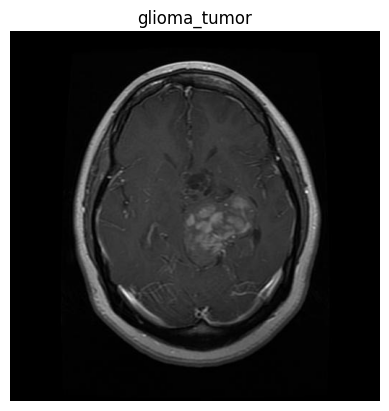

In [4]:
# Select one class
class_name = classes[0]
class_path = os.path.join(DATASET_PATH, class_name)

# Select one image
image_name = os.listdir(class_path)[0]
image_path = os.path.join(class_path, image_name)

# Read image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image)
plt.title(class_name)
plt.axis("off")


In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [6]:
IMG_SIZE = 224


In [7]:
X = []  # images
y = []  # labels

In [8]:
for class_name in classes:
    class_path = os.path.join(DATASET_PATH, class_name)
    
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        
        # Read image
        img = cv2.imread(img_path)
        
        if img is not None:
            # Resize image
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            # Normalize
            img = img / 255.0
            
            X.append(img)
            y.append(class_name)


In [9]:
X = np.array(X)
y = np.array(y)

print("Image data shape:", X.shape)
print("Labels shape:", y.shape)


Image data shape: (2870, 224, 224, 3)
Labels shape: (2870,)


In [10]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Encoded labels:", np.unique(y_encoded))

Encoded labels: [0 1 2 3]


In [11]:
y_categorical = to_categorical(y_encoded)

print("One-hot labels shape:", y_categorical.shape)

One-hot labels shape: (2870, 4)


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical,
    test_size=0.2,
    random_state=42,
    stratify=y_categorical
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (2296, 224, 224, 3)
Testing samples: (574, 224, 224, 3)


In [14]:
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(4, activation='softmax'))


C:\Users\mythi\anaconda3\envs\brain_tumor\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 45s 590ms/step - accuracy: 0.4593 - loss: 1.2846 - val_accuracy: 0.6847 - val_loss: 0.7404
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 554ms/step - accuracy: 0.6817 - loss: 0.7317 - val_accuracy: 0.8031 - val_loss: 0.5066
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 45s 626ms/step - accuracy: 0.7931 - loss: 0.5065 - val_accuracy: 0.8397 - val_loss: 0.4118
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 52s 722ms/step - accuracy: 0.8713 - loss: 0.3462 - val_accuracy: 0.8711 - val_loss: 0.3365
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 54s 745ms/step - accuracy: 0.8781 - loss: 0.3060 - val_accuracy: 0.8798 - val_loss: 0.3380
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 56s 782ms/step - accuracy: 0.9100 - loss: 0.2228 - val_accuracy: 0.9129 - val_loss: 0.2710
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 52s 715ms/step - accuracy: 0.9242 - loss: 0.1955 - val_accuracy: 0.9164 - val_loss: 0.2774
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 51s 704ms/step - accuracy: 0.9375 - loss: 0.1487 - val_accu

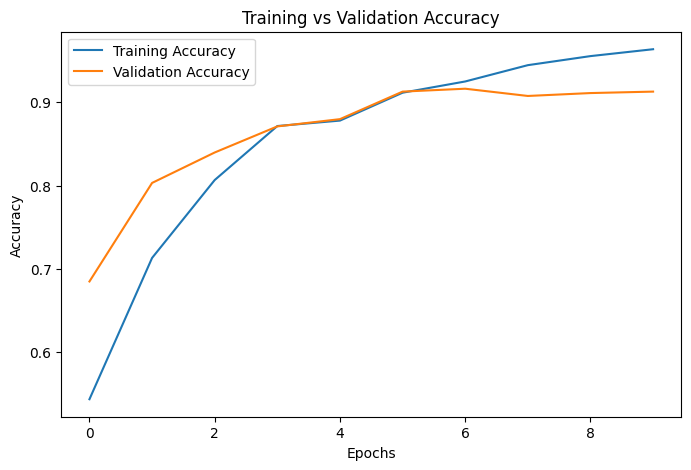

In [18]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

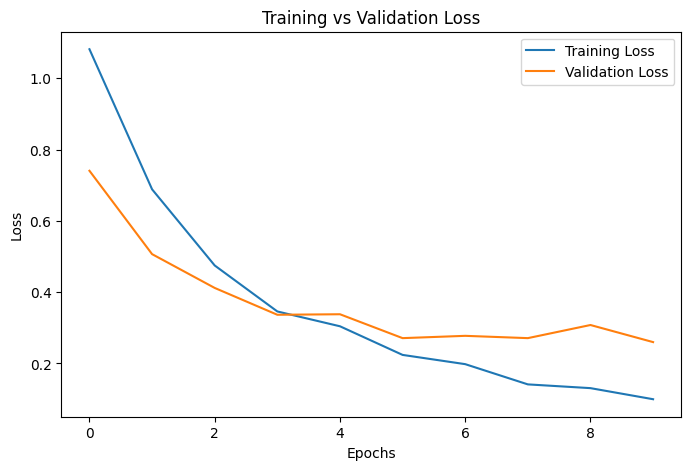

In [19]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Test Accuracy: 0.9128919839859009
Test Loss: 0.25983306765556335


In [21]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step


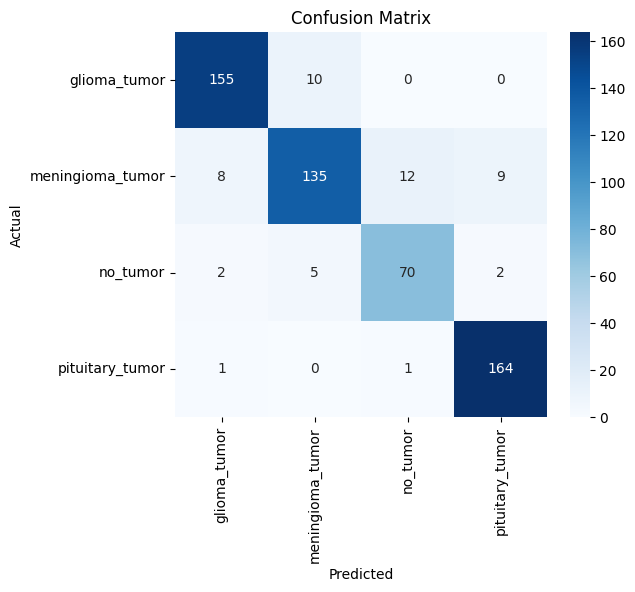

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print(classification_report(
    y_true_classes,
    y_pred_classes,
    target_names=label_encoder.classes_
))


                  precision    recall  f1-score   support

    glioma_tumor       0.93      0.94      0.94       165
meningioma_tumor       0.90      0.82      0.86       164
        no_tumor       0.84      0.89      0.86        79
 pituitary_tumor       0.94      0.99      0.96       166

        accuracy                           0.91       574
       macro avg       0.90      0.91      0.91       574
    weighted avg       0.91      0.91      0.91       574



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


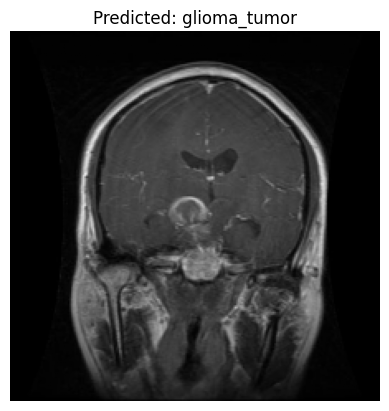

In [24]:
# Pick one test image
sample_img = X_test[0]

# Expand dimensions
sample_img_exp = np.expand_dims(sample_img, axis=0)

# Predict
prediction = model.predict(sample_img_exp)
predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])

# Display image
plt.imshow(sample_img)
plt.title(f"Predicted: {predicted_class[0]}")
plt.axis("off")
plt.show()

In [25]:
import tensorflow as tf


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,508,430 (127.82 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,954 (85.22 MB)

In [28]:
# Select a test image
img = X_test[0]
img_array = np.expand_dims(img, axis=0)
    

In [33]:
# Explicitly build the model by calling it once
_ = model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Create functional wrapper
inputs = Input(shape=(224, 224, 3))
outputs = model(inputs)

functional_model = Model(inputs, outputs)


In [44]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

inputs = Input(shape=(224, 224, 3), name="input_layer")

x = Conv2D(32, (3,3), activation='relu', name="conv1")(inputs)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', name="conv2")(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', name="conv3")(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(4, activation='softmax', name="output")(x)

gradcam_model = Model(inputs, outputs)


In [45]:
gradcam_model.set_weights(model.get_weights())


In [46]:
gradcam_model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = Model(
        model.inputs,
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()


In [48]:
img = X_test[0]
img_array = np.expand_dims(img, axis=0)

heatmap = make_gradcam_heatmap(
    img_array,
    gradcam_model,
    "conv3"
)


C:\Users\mythi\anaconda3\envs\brain_tumor\lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333333333333].


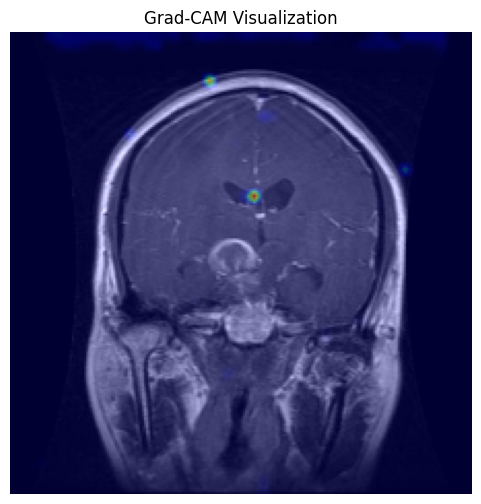

In [49]:
import matplotlib.cm as cm

heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap_colored = cm.jet(heatmap_resized)[:, :, :3]

superimposed_img = heatmap_colored * 0.4 + img

plt.figure(figsize=(6,6))
plt.imshow(superimposed_img)
plt.title("Grad-CAM Visualization")
plt.axis("off")
plt.show()
